In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_parquet("datasets/train.parquet")

In [3]:
df

,seq_ix,step_in_seq,need_prediction,0,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,-0.080082,1.324564,0.637730,-1.091486,-0.859104,1.291364,-1.046394,...,0.876881,-1.425938,-0.104571,1.253508,-1.155514,-0.907224,1.361777,0.602751,1.265182,-0.495940
1,0,1,0,-1.243274,0.398425,-1.810485,-0.427042,0.303473,0.304587,-0.392796,...,0.669286,-0.720985,-1.144171,0.724269,-1.259564,0.181201,0.529757,-0.076843,1.111895,-1.171435
2,0,2,0,-0.124680,1.225580,0.139482,-0.967710,-0.769101,1.208697,-1.218701,...,0.742988,-1.381406,0.043121,1.205969,-1.062414,-0.739191,1.266046,0.856712,1.205016,-0.417057
3,0,3,0,-1.264455,0.494485,-1.041663,-0.587907,0.203893,0.437923,-0.479116,...,0.808542,-0.777047,-1.163911,0.801497,-1.280313,-0.090955,0.636906,-0.213926,1.121746,-1.364489
4,0,4,0,-0.882663,-0.223168,-1.229349,0.029471,0.459377,-0.232340,0.113789,...,0.286553,-0.114436,-0.730509,0.301325,-0.782454,0.486104,-0.172012,-0.016936,0.674722,-0.740237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516995,516,995,1,-0.637696,-0.938058,-0.717372,0.765730,0.837935,-1.077906,0.665360,...,-0.109771,0.597868,-0.337359,-0.200192,0.029267,0.917658,-1.164635,-0.115904,0.082596,-0.153497
516996,516,996,1,-0.742073,-0.872802,-0.913195,0.667820,0.760674,-1.001379,0.370095,...,-0.072015,0.479413,-0.358344,-0.131352,-0.006000,0.864407,-1.085941,-0.151058,0.047374,-0.274957
516997,516,997,1,-0.627282,-0.947610,-0.704207,0.777083,0.842881,-1.083484,0.691369,...,-0.112420,0.609684,-0.336021,-0.207586,0.032277,0.920959,-1.169182,-0.113311,0.085180,-0.143595
516998,516,998,1,-0.781694,-0.876804,-1.356198,0.876537,0.927931,-1.007557,0.594830,...,-0.164312,0.454387,-0.464434,-0.114372,-0.170993,1.121660,-1.165715,0.081101,0.248766,-0.170322


Всего features: 32
Длина последовательности: 1000
Features: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


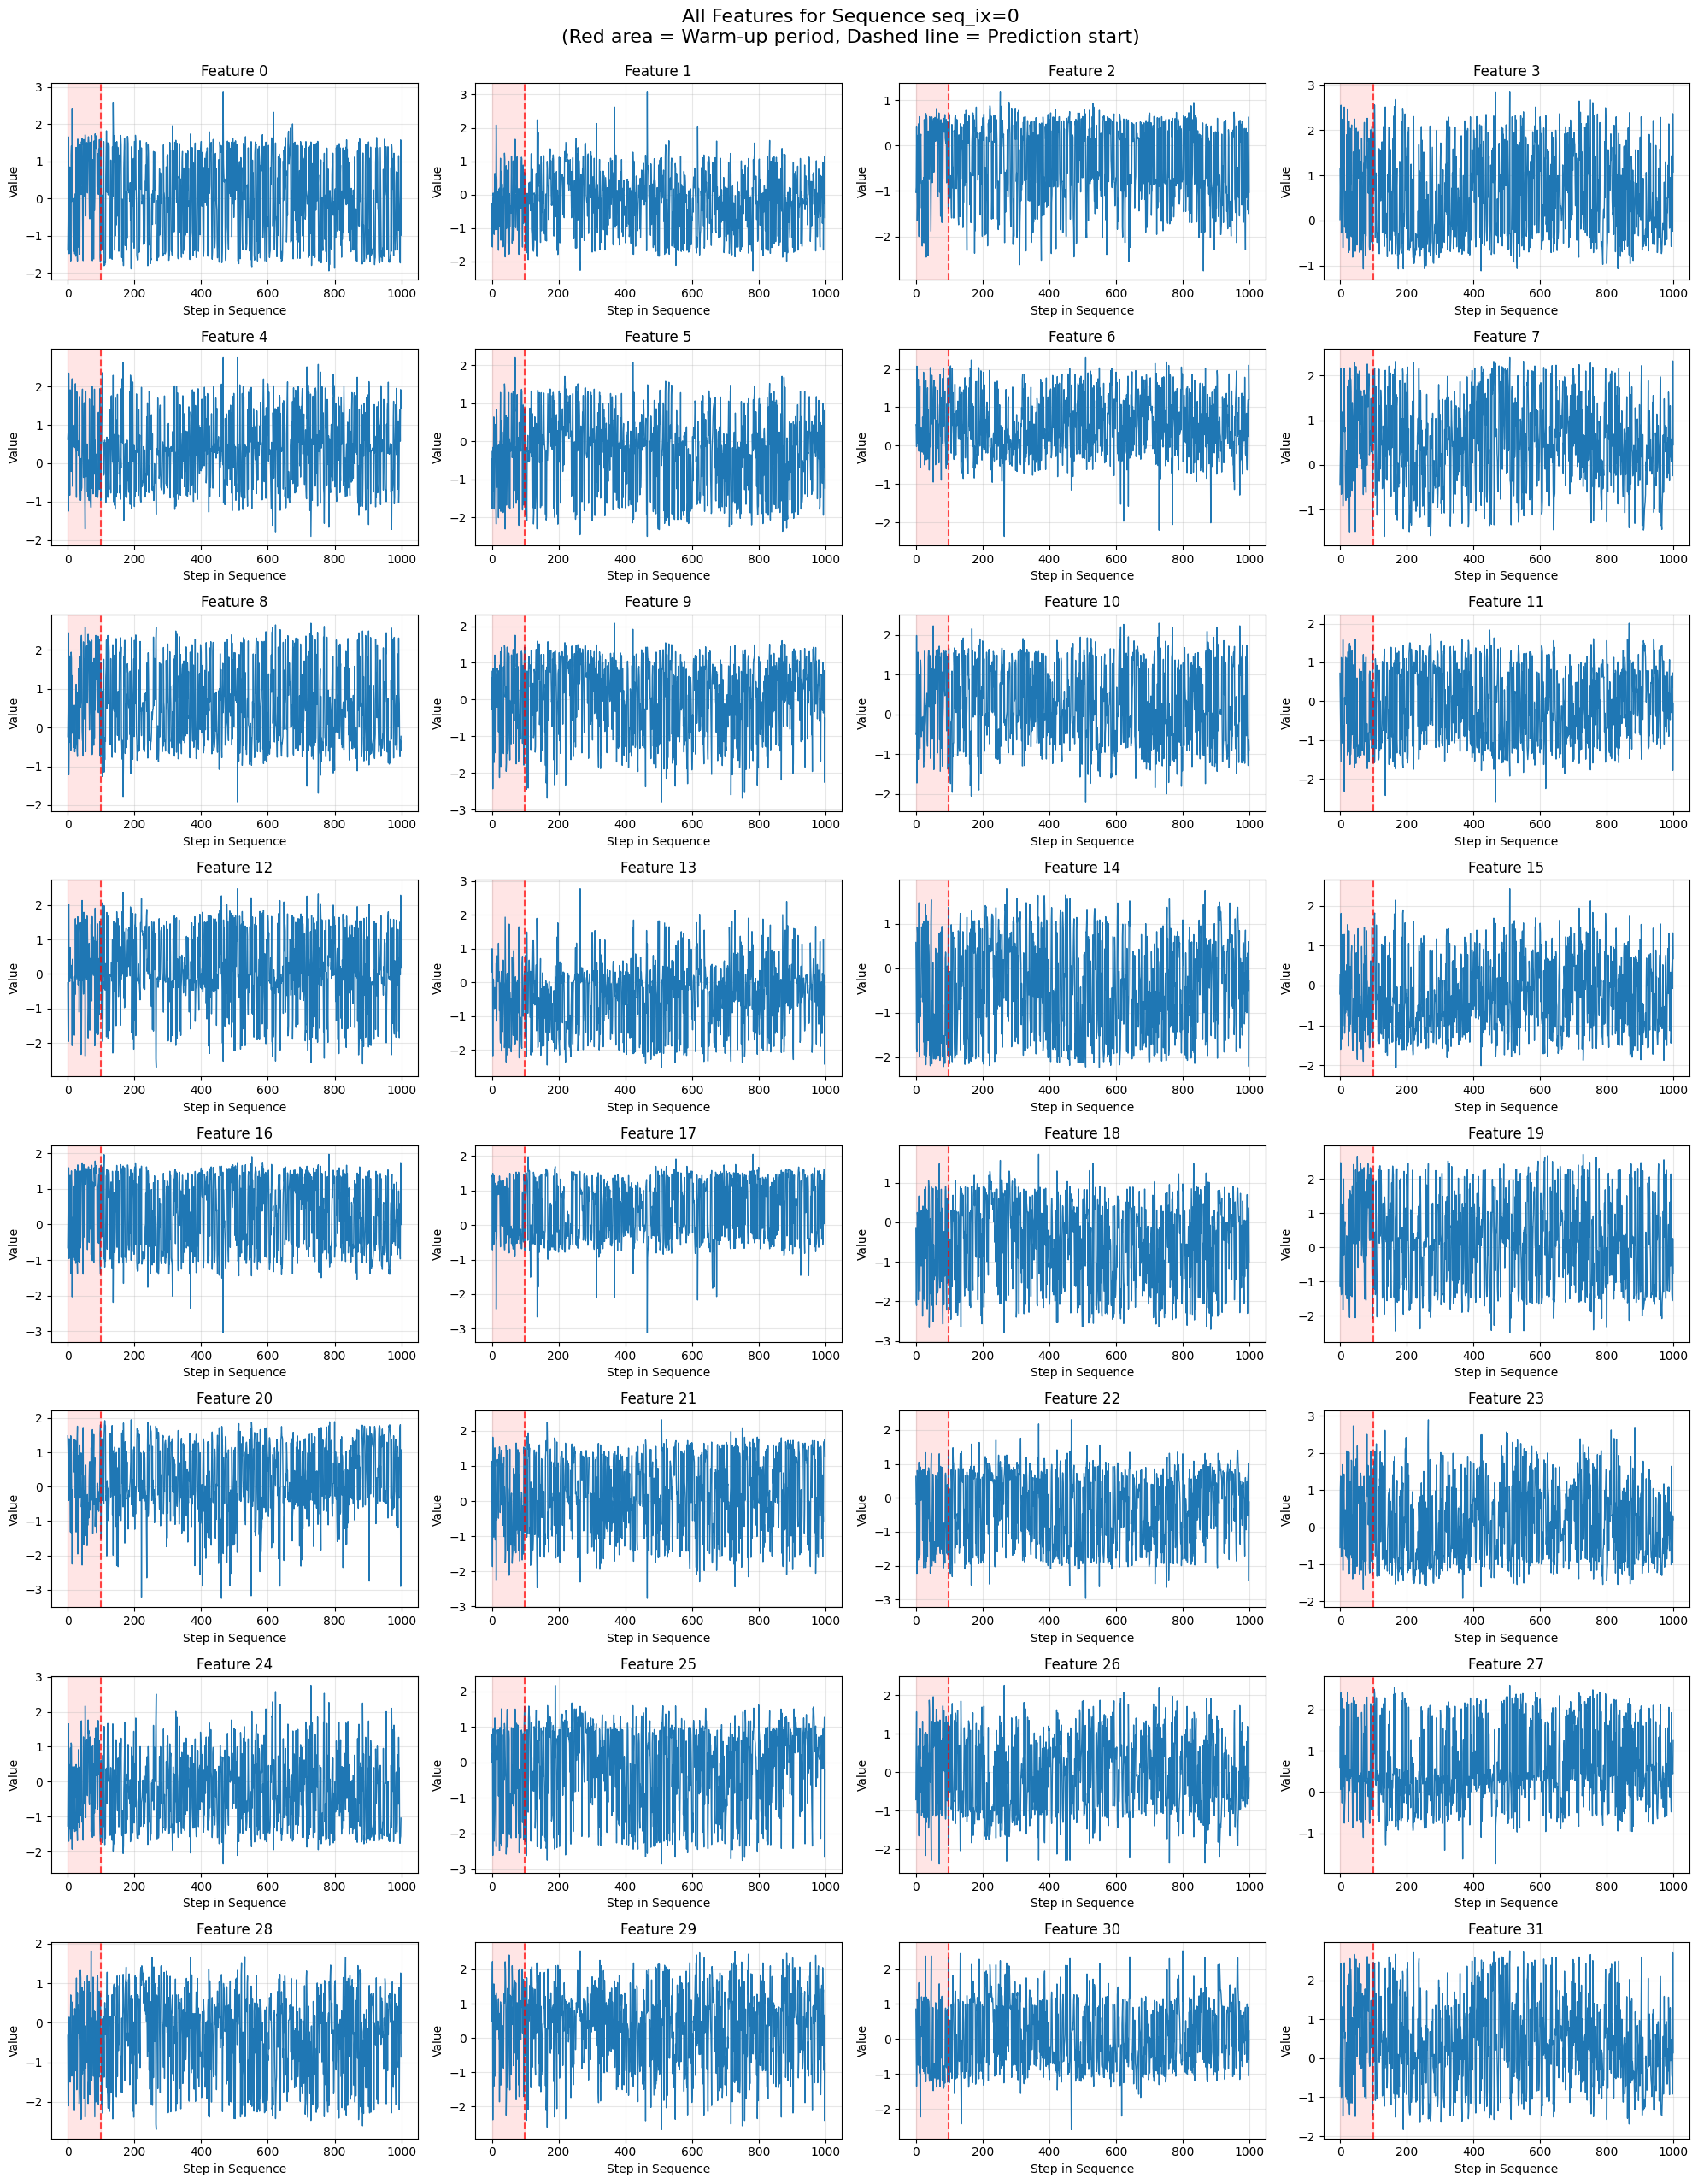

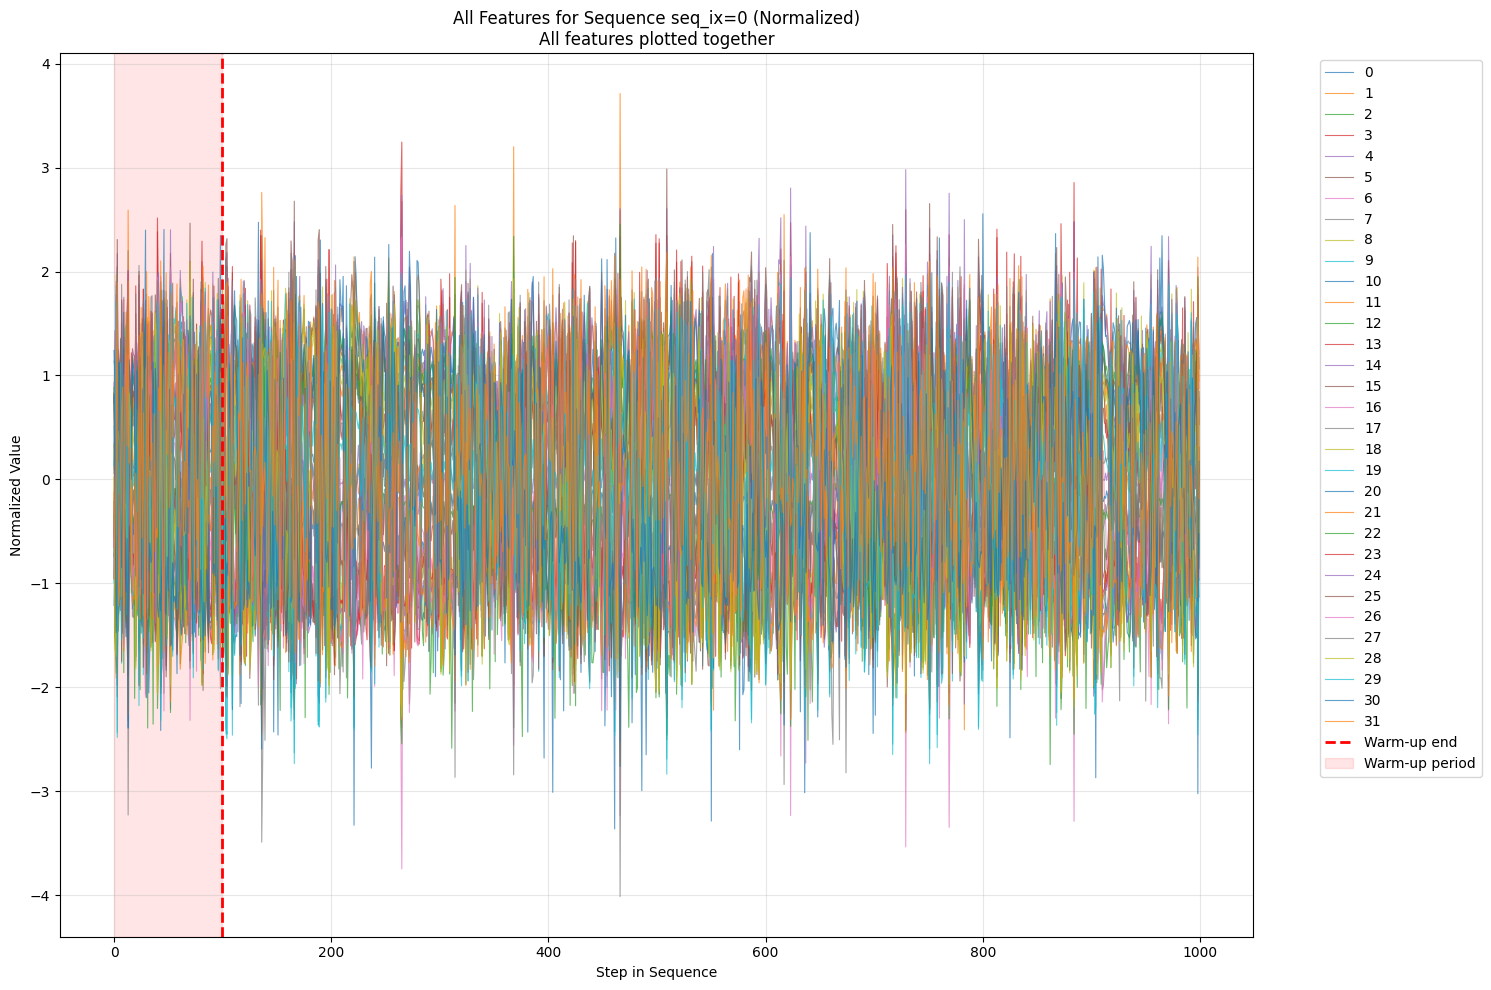


Статистика для seq_ix=0:
Количество шагов: 1000
Шаги для предсказания (need_prediction=True): 899
Диапазон step_in_seq: 0 - 999


In [7]:
seq_0 = df[df['seq_ix'] == 1].copy()

# Сортируем по step_in_seq для правильного порядка
seq_0 = seq_0.sort_values('step_in_seq')

# Получаем список всех feature колонок (исключаем служебные колонки)
feature_columns = [col for col in seq_0.columns if col not in ['seq_ix', 'step_in_seq', 'need_prediction']]
n_features = len(feature_columns)

print(f"Всего features: {n_features}")
print(f"Длина последовательности: {len(seq_0)}")
print(f"Features: {feature_columns}")

# Создаем фигуру с субплогами
fig, axes = plt.subplots(8, 4, figsize=(20, 25))
axes = axes.flatten()

# Рисуем каждый feature в отдельном субплоте
for i, feature in enumerate(feature_columns):
    if i < len(axes):
        axes[i].plot(seq_0['step_in_seq'], seq_0[feature], linewidth=1)
        axes[i].set_title(f'Feature {feature}')
        axes[i].set_xlabel('Step in Sequence')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, alpha=0.3)
        
        # Добавляем вертикальную линию для разделения warm-up периода
        axes[i].axvline(x=99, color='red', linestyle='--', alpha=0.7, label='Warm-up end')
        
        # Закрашиваем warm-up период
        axes[i].axvspan(0, 99, alpha=0.1, color='red', label='Warm-up period')

# Убираем лишние субплоги
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle(f'All Features for Sequence seq_ix=0\n(Red area = Warm-up period, Dashed line = Prediction start)', 
             y=1.02, fontsize=16)
plt.show()

# Также создадим обзорный график со всеми features вместе
plt.figure(figsize=(15, 10))

# Нормализуем данные для лучшей визуализации
normalized_data = (seq_0[feature_columns] - seq_0[feature_columns].mean()) / seq_0[feature_columns].std()

for feature in feature_columns:
    plt.plot(seq_0['step_in_seq'], normalized_data[feature], alpha=0.7, linewidth=0.8, label=feature)

plt.xlabel('Step in Sequence')
plt.ylabel('Normalized Value')
plt.title('All Features for Sequence seq_ix=0 (Normalized)\nAll features plotted together')
plt.axvline(x=99, color='red', linestyle='--', linewidth=2, label='Warm-up end')
plt.axvspan(0, 99, alpha=0.1, color='red', label='Warm-up period')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Статистика по последовательности
print(f"\nСтатистика для seq_ix=0:")
print(f"Количество шагов: {len(seq_0)}")
print(f"Шаги для предсказания (need_prediction=True): {seq_0['need_prediction'].sum()}")
print(f"Диапазон step_in_seq: {seq_0['step_in_seq'].min()} - {seq_0['step_in_seq'].max()}")

